In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

# Cliente para datos sísmicos (puedes usar IRIS o IPGP si te interesa Francia/Reunión)
client = Client("IRIS")  # o "IPGP", "USGS", "GEONET", "SCEDC", etc.

# Define el rango de fechas
starttime = UTCDateTime("2020-01-01")
endtime = UTCDateTime("2020-12-31")

# Define ubicación del volcán (ej: Villarrica, Chile)
latitude = -39.42
longitude = -71.93
maxradius = 1.0  # grados (1 grado ≈ 111 km)

c:\Users\nicol\anaconda3\envs\volcan-seismic\Lib\site-packages\obspy\core\util\base.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
catalog = client.get_events(
    starttime=starttime,
    endtime=endtime,
    latitude=latitude,
    longitude=longitude,
    maxradius=maxradius,
    minmagnitude=1.0,
    includeallorigins=True,
    includearrivals=True,
)

print(catalog)


3 Event(s) in Catalog:
2020-12-29T19:29:27.559000Z | -39.323,  -72.066 | 4.8  Mww
2020-01-29T09:15:22.182000Z | -39.343,  -72.320 | 4.1  mb
2020-01-13T02:01:41.628000Z | -40.213,  -71.263 | 5.3  Mww


In [4]:
filtered = catalog.filter("magnitude >= 4.5")
print(filtered)



2 Event(s) in Catalog:
2020-12-29T19:29:27.559000Z | -39.323,  -72.066 | 4.8  Mww
2020-01-13T02:01:41.628000Z | -40.213,  -71.263 | 5.3  Mww


In [5]:
import pandas as pd

data = {
    "time": [ev.origins[0].time.datetime for ev in catalog],
    "latitude": [ev.origins[0].latitude for ev in catalog],
    "longitude": [ev.origins[0].longitude for ev in catalog],
    "depth_km": [ev.origins[0].depth / 1000 for ev in catalog],
    "magnitude": [ev.magnitudes[0].mag for ev in catalog],
}

df = pd.DataFrame(data)
print(df)


                     time  latitude  longitude  depth_km  magnitude
0 2020-12-29 19:29:27.559  -39.3232   -72.0657    107.81        4.8
1 2020-01-29 09:15:22.182  -39.3431   -72.3203     92.42        4.1
2 2020-01-13 02:01:41.628  -40.2133   -71.2633    174.20        5.3


In [8]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")

# Rango de fechas
starttime = UTCDateTime("2023-01-01")
endtime = UTCDateTime("2025-07-23")  # Hoy o la fecha final deseada

# Coordenadas aproximadas del volcán Villarrica
latitude = -39.42
longitude = -71.93
maxradius = 1.0  # radio en grados (aprox 111 km)


In [10]:
catalog = client.get_events(
    starttime=starttime,
    endtime=endtime,
    latitude=latitude,
    longitude=longitude,
    maxradius=maxradius,
    minmagnitude=1.0,          # puedes cambiar a 0.5 o 2.0 según sensibilidad deseada
    includeallorigins=True,
    includearrivals=True
)


In [14]:
from collections import Counter
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")

starttime = UTCDateTime("2018-01-01")
endtime = UTCDateTime("2018-12-31")
latitude = 19.4069   # Kīlauea approx
longitude = -155.2834
maxradius = 1.0

catalog = client.get_events(
    starttime=starttime,
    endtime=endtime,
    latitude=latitude,
    longitude=longitude,
    maxradius=maxradius,
    minmagnitude=1.0
)

print(f"Eventos encontrados: {len(catalog)}")

# Extraer tipos de eventos y contarlos
event_types = []
for event in catalog:
    # event.event_type puede no existir en todos, usar atributo .eventtype o .event_type
    # En ObsPy usualmente es event.event_type o event.eventtype o event.eventtype[0]
    # Según la versión, prueba esta forma:
    etype = getattr(event, "event_type", None)  # o event.eventtype en otras versiones
    if etype is None:
        # A veces está en event.eventtype (lista)
        etype = getattr(event, "eventtype", None)
        if etype and len(etype) > 0:
            etype = etype[0].resource_id.id if hasattr(etype[0], "resource_id") else str(etype[0])
        else:
            etype = "unknown"
    event_types.append(etype)

# Contar y mostrar resumen
counts = Counter(event_types)
print("Resumen tipos de eventos:")
for etype, count in counts.items():
    print(f"{etype}: {count}")


Eventos encontrados: 43702
Resumen tipos de eventos:
earthquake: 43702


Primeras filas del DataFrame:
                   archivo  duracion_segundos estacion canal  sampling_rate  \
0  CL.LC01.01.HHE.2022.001           86399.99     LC01   HHE          100.0   
1  CL.LC01.01.HHE.2022.002           86399.99     LC01   HHE          100.0   
2  CL.LC01.01.HHE.2022.003           86399.99     LC01   HHE          100.0   
3  CL.LC01.01.HHE.2022.004           86399.99     LC01   HHE          100.0   
4  CL.LC01.01.HHE.2022.005           86399.99     LC01   HHE          100.0   

      npts                 starttime                          endtime  
0  8640000 2022-01-01 00:00:00+00:00 2022-01-01 23:59:59.990000+00:00  
1  8640000 2022-01-02 00:00:00+00:00 2022-01-02 23:59:59.990000+00:00  
2  8640000 2022-01-03 00:00:00+00:00 2022-01-03 23:59:59.990000+00:00  
3  8640000 2022-01-04 00:00:00+00:00 2022-01-04 23:59:59.990000+00:00  
4  8640000 2022-01-05 00:00:00+00:00 2022-01-05 23:59:59.990000+00:00   

Número total de archivos: 3447
Duración total (horas): 82434.

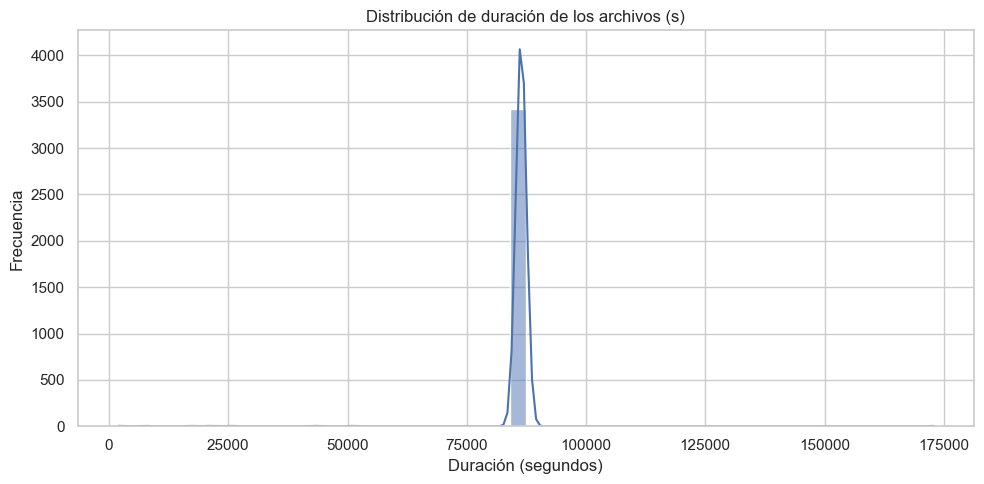

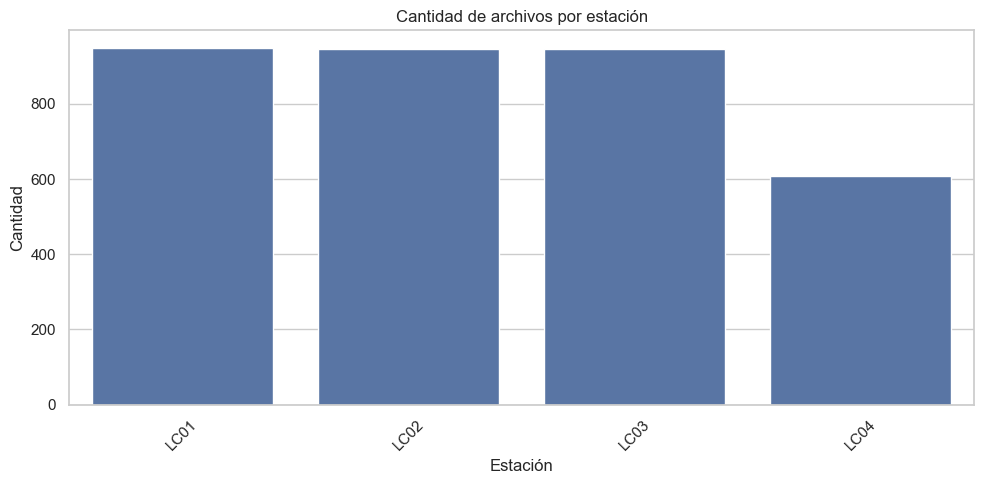

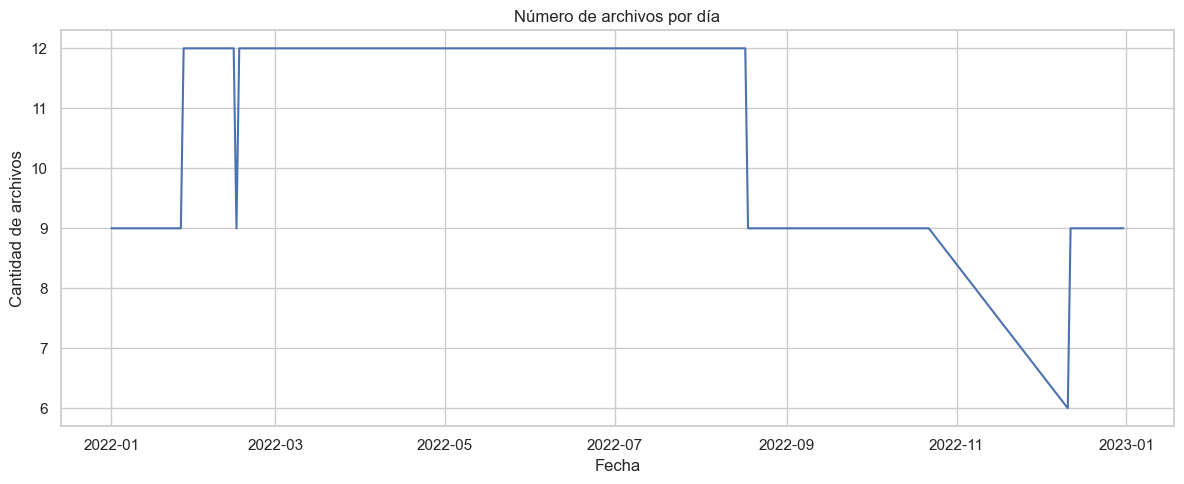

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
df = pd.read_csv("resumen_archivos.csv", parse_dates=["starttime", "endtime"])

# Mostrar las primeras filas
print("Primeras filas del DataFrame:")
print(df.head(), "\n")

# Estadísticas generales
print("Número total de archivos:", len(df))
print("Duración total (horas):", df["duracion_segundos"].sum() / 3600)
print("Duración promedio (s):", df["duracion_segundos"].mean())
print("Duración mínima (s):", df["duracion_segundos"].min())
print("Duración máxima (s):", df["duracion_segundos"].max())
print("\n")

# Distribución por estación
print("Cantidad de archivos por estación:")
print(df["estacion"].value_counts(), "\n")

# Distribución por canal
print("Cantidad de archivos por canal:")
print(df["canal"].value_counts(), "\n")

# Sampling rates únicos
print("Sampling rates encontrados:")
print(df["sampling_rate"].value_counts(), "\n")

# Rango de fechas
print("Primer registro:", df["starttime"].min())
print("Último registro:", df["endtime"].max(), "\n")

# npts: resumen
print("npts promedio:", df["npts"].mean())
print("npts mínimo:", df["npts"].min())
print("npts máximo:", df["npts"].max())

# === GRAFICOS ===
sns.set(style="whitegrid")

# Histograma de duración
plt.figure(figsize=(10, 5))
sns.histplot(df["duracion_segundos"], bins=50, kde=True)
plt.title("Distribución de duración de los archivos (s)")
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Archivos por estación
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="estacion", order=df["estacion"].value_counts().index)
plt.title("Cantidad de archivos por estación")
plt.xlabel("Estación")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Archivos en el tiempo (timeline)
df["fecha"] = df["starttime"].dt.date
conteo_por_dia = df.groupby("fecha").size()

plt.figure(figsize=(12, 5))
conteo_por_dia.plot()
plt.title("Número de archivos por día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de archivos")
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Cargar archivo
df = pd.read_csv("resumen_archivos.csv", parse_dates=["starttime", "endtime"])

# Agrupar por estacion y starttime
grupo = df.groupby(["estacion", "starttime"])["canal"].nunique().reset_index()

# Filtrar solo los eventos que tienen los 3 canales (HHE, HHN, HHZ)
trios = grupo[grupo["canal"] == 3]

# Mostrar resumen
print("Cantidad total de eventos con los 3 canales:", len(trios))
print("\nEjemplo de eventos con trío completo:")
print(trios.head())

# (Opcional) Ver cuántos tríos por estación
trios_por_estacion = trios["estacion"].value_counts()
print("\nCantidad de tríos por estación:")
print(trios_por_estacion)


Cantidad total de eventos con los 3 canales: 1149

Ejemplo de eventos con trío completo:
  estacion                 starttime  canal
0     LC01 2022-01-01 00:00:00+00:00      3
1     LC01 2022-01-02 00:00:00+00:00      3
2     LC01 2022-01-03 00:00:00+00:00      3
3     LC01 2022-01-04 00:00:00+00:00      3
4     LC01 2022-01-05 00:00:00+00:00      3

Cantidad de tríos por estación:
estacion
LC01    316
LC02    315
LC03    315
LC04    203
Name: count, dtype: int64


Estación: LC01
Fecha de inicio: 2022-01-01 00:00:00+00:00
Canales disponibles: ['HHE', 'HHN', 'HHZ']


C:\Users\nicol\AppData\Local\Temp\ipykernel_3532\887788211.py:49: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\nicol\anaconda3\envs\volcan-seismic\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


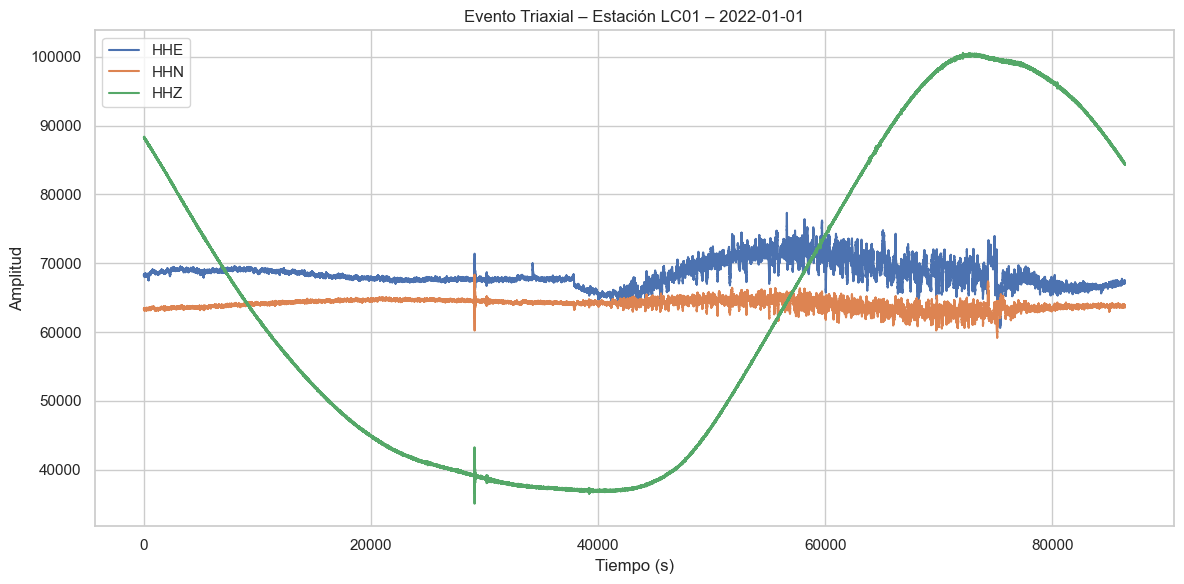

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from obspy import read
import os

# Ruta base donde están los archivos
ruta_base = r"C:\Users\nicol\OneDrive\Escritorio\2021"

# Leer el CSV
df = pd.read_csv("resumen_archivos.csv", parse_dates=["starttime", "endtime"])

# Buscar un evento triaxial
grupo = df.groupby(["estacion", "starttime"])["canal"].nunique().reset_index()
trios = grupo[grupo["canal"] == 3]

# Tomamos el primer evento triaxial
evento = trios.iloc[0]
estacion_ejemplo = evento["estacion"]
starttime_ejemplo = evento["starttime"]

# Filtrar las 3 trazas del evento
trazas_evento = df[
    (df["estacion"] == estacion_ejemplo) &
    (df["starttime"] == starttime_ejemplo)
].sort_values("canal")  # HHE, HHN, HHZ

# Mostrar información
print("Estación:", estacion_ejemplo)
print("Fecha de inicio:", starttime_ejemplo)
print("Canales disponibles:", trazas_evento["canal"].tolist())

# Graficar
plt.figure(figsize=(12, 6))
for _, row in trazas_evento.iterrows():
    # Construir la ruta completa al archivo
    ruta_archivo = os.path.join(ruta_base, row["archivo"])
    
    # Leer archivo con ObsPy
    traza = read(ruta_archivo)[0]
    tiempo = traza.times("relative")

    # Graficar
    plt.plot(tiempo, traza.data, label=row["canal"])

plt.title(f"Evento Triaxial – Estación {estacion_ejemplo} – {starttime_ejemplo.date()}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.tight_layout()
plt.show()


1 Trace(s) in Stream:
CL.LC11.01.HHN | 2018-05-10T00:00:00.000000Z - 2018-05-10T23:59:59.998000Z | 500.0 Hz, 43200000 samples
         network: CL
         station: LC11
        location: 01
         channel: HHN
       starttime: 2018-05-10T00:00:00.000000Z
         endtime: 2018-05-10T23:59:59.998000Z
   sampling_rate: 500.0
           delta: 0.002
            npts: 43200000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 22479, 'encoding': 'STEIM1', 'byteorder': '<', 'record_length': 4096, 'filesize': 92073984})


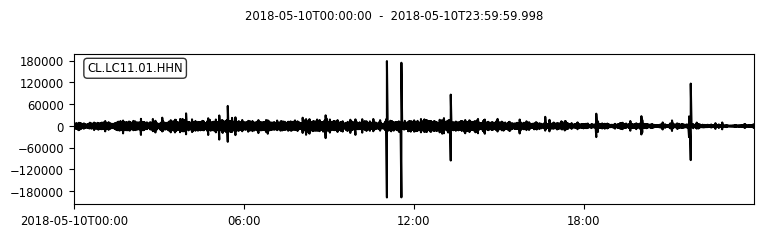

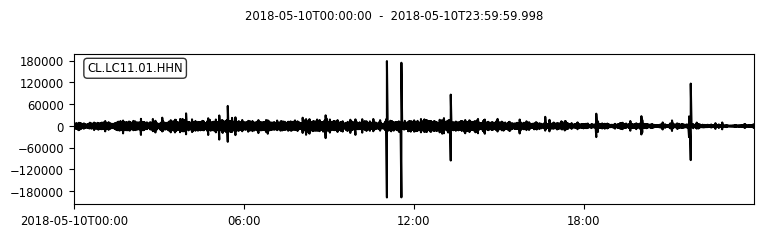

In [13]:
from obspy import read

# Cambia esta ruta por la ruta real de tu archivo
archivo = "CL.LC11.01.HHN.2018.130"

# Leer el archivo
st = read(archivo)

# Mostrar información básica
print(st)

# Mostrar detalles de las trazas
for tr in st:
    print(tr.stats)

# Graficar la señal (opcional)
st.plot()


In [19]:
from obspy import read, Stream
from obspy.signal.trigger import classic_sta_lta, trigger_onset

archivo = "data/CL.LC11.01.HHN.2018.130"
st = read(archivo)

# Parámetros del detector STA/LTA (puedes ajustar)
sta_window = 5  # segundos
lta_window = 10 # segundos
on_threshold = 1.25
off_threshold = 0.5

eventos_extraidos = Stream()

for tr in st:
    df = tr.stats.sampling_rate
    cft = classic_sta_lta(tr.data, int(sta_window * df), int(lta_window * df))
    triggers = trigger_onset(cft, on_threshold, off_threshold)

    print(f"Canal {tr.id} tiene {len(triggers)} eventos detectados.")

    for trig in triggers:
        inicio = trig[0]
        fin = trig[1]
        evento = tr.slice(starttime=tr.stats.starttime + inicio / df,
                          endtime=tr.stats.starttime + fin / df)
        eventos_extraidos.append(evento)

print(f"Total eventos extraídos en el stream: {len(eventos_extraidos)}")

# Ahora puedes guardar eventos separados o analizarlos como quieras
# Por ejemplo, guardar cada evento en un MiniSEED individual
for i, evento in enumerate(eventos_extraidos):
    nombre_archivo = f"evento_{i+1}_{evento.id}.mseed"
    evento.write(nombre_archivo, format='MSEED')
    print(f"Guardado {nombre_archivo}")


Canal CL.LC11.01.HHN tiene 353 eventos detectados.
Total eventos extraídos en el stream: 353
Guardado evento_1_CL.LC11.01.HHN.mseed
Guardado evento_2_CL.LC11.01.HHN.mseed
Guardado evento_3_CL.LC11.01.HHN.mseed
Guardado evento_4_CL.LC11.01.HHN.mseed
Guardado evento_5_CL.LC11.01.HHN.mseed
Guardado evento_6_CL.LC11.01.HHN.mseed
Guardado evento_7_CL.LC11.01.HHN.mseed
Guardado evento_8_CL.LC11.01.HHN.mseed
Guardado evento_9_CL.LC11.01.HHN.mseed
Guardado evento_10_CL.LC11.01.HHN.mseed
Guardado evento_11_CL.LC11.01.HHN.mseed
Guardado evento_12_CL.LC11.01.HHN.mseed
Guardado evento_13_CL.LC11.01.HHN.mseed
Guardado evento_14_CL.LC11.01.HHN.mseed
Guardado evento_15_CL.LC11.01.HHN.mseed
Guardado evento_16_CL.LC11.01.HHN.mseed
Guardado evento_17_CL.LC11.01.HHN.mseed
Guardado evento_18_CL.LC11.01.HHN.mseed
Guardado evento_19_CL.LC11.01.HHN.mseed
Guardado evento_20_CL.LC11.01.HHN.mseed
Guardado evento_21_CL.LC11.01.HHN.mseed
Guardado evento_22_CL.LC11.01.HHN.mseed
Guardado evento_23_CL.LC11.01.HHN.ms

In [21]:
from obspy import read, Stream
from obspy.signal.trigger import classic_sta_lta, trigger_onset

archivo = "data/CL.LC11.01.HHN.2018.130"
st = read(archivo)

# Parámetros filtro para VT (ajustar según región)
fmin_vt = 5.0  # Hz
fmax_vt = 20.0  # Hz

# Parámetros STA/LTA
sta_window = 0.5  # segundos (más corto para eventos impulsivos)
lta_window = 2.0  # segundos
on_threshold = 3.0
off_threshold = 1.0

eventos_vt = Stream()

for tr in st:
    tr_filt = tr.copy()
    tr_filt.detrend('linear')
    # Opcional: tr_filt.taper(max_percentage=0.05)
    tr_filt.filter('bandpass', freqmin=fmin_vt, freqmax=fmax_vt, corners=4, zerophase=True)

    df = tr_filt.stats.sampling_rate
    data_norm = (tr_filt.data - tr_filt.data.mean()) / tr_filt.data.std()

    cft = classic_sta_lta(data_norm, int(sta_window * df), int(lta_window * df))
    triggers = trigger_onset(cft, on_threshold, off_threshold)

    print(f"Canal {tr.id} tiene {len(triggers)} eventos VT detectados.")

    for trig in triggers:
        inicio = trig[0]
        fin = trig[1]
        evento = tr.slice(starttime=tr.stats.starttime + inicio / df,
                          endtime=tr.stats.starttime + fin / df)
        eventos_vt.append(evento)

print(f"Total eventos VT extraídos: {len(eventos_vt)}")

# Opcional: guardar eventos
for i, evento in enumerate(eventos_vt):
    nombre_archivo = f"evento_VT_{i+1}_{evento.id}.mseed"
    evento.write(nombre_archivo, format='MSEED')
    print(f"Guardado {nombre_archivo}")



Canal CL.LC11.01.HHN tiene 31 eventos VT detectados.
Total eventos VT extraídos: 31
Guardado evento_VT_1_CL.LC11.01.HHN.mseed
Guardado evento_VT_2_CL.LC11.01.HHN.mseed
Guardado evento_VT_3_CL.LC11.01.HHN.mseed
Guardado evento_VT_4_CL.LC11.01.HHN.mseed
Guardado evento_VT_5_CL.LC11.01.HHN.mseed
Guardado evento_VT_6_CL.LC11.01.HHN.mseed
Guardado evento_VT_7_CL.LC11.01.HHN.mseed
Guardado evento_VT_8_CL.LC11.01.HHN.mseed
Guardado evento_VT_9_CL.LC11.01.HHN.mseed
Guardado evento_VT_10_CL.LC11.01.HHN.mseed
Guardado evento_VT_11_CL.LC11.01.HHN.mseed
Guardado evento_VT_12_CL.LC11.01.HHN.mseed
Guardado evento_VT_13_CL.LC11.01.HHN.mseed
Guardado evento_VT_14_CL.LC11.01.HHN.mseed
Guardado evento_VT_15_CL.LC11.01.HHN.mseed
Guardado evento_VT_16_CL.LC11.01.HHN.mseed
Guardado evento_VT_17_CL.LC11.01.HHN.mseed
Guardado evento_VT_18_CL.LC11.01.HHN.mseed
Guardado evento_VT_19_CL.LC11.01.HHN.mseed
Guardado evento_VT_20_CL.LC11.01.HHN.mseed
Guardado evento_VT_21_CL.LC11.01.HHN.mseed
Guardado evento_VT_22_

In [23]:
duration_fixed = 60  # duración fija en segundos

for trig in triggers:
    start_idx = trig[0]
    starttime_event = tr.stats.starttime + start_idx / df

    # Calcular fin del segmento fijo de 60s (o menos si se sale del rango)
    endtime_event = starttime_event + duration_fixed
    if endtime_event > tr.stats.endtime:
        endtime_event = tr.stats.endtime  # no pasar del final

    evento = tr.slice(starttime=starttime_event, endtime=endtime_event)
    eventos_extraidos.append(evento)
for tr in st:
    df = tr.stats.sampling_rate
    cft = classic_sta_lta(tr.data, int(sta_window * df), int(lta_window * df))
    triggers = trigger_onset(cft, on_threshold, off_threshold)

    for trig in triggers:
        start_idx = trig[0]
        starttime_event = tr.stats.starttime + start_idx / df

        endtime_event = starttime_event + duration_fixed
        if endtime_event > tr.stats.endtime:
            endtime_event = tr.stats.endtime

        evento = tr.slice(starttime=starttime_event, endtime=endtime_event)
        eventos_extraidos.append(evento)



Exception: ERROR 1 stalta: len(data) < nlta

In [11]:
from obspy import read

archivo = "CL.LC01.01.HHE.2018.062"
st = read(archivo)

print(st)  # Muestra resumen con número de trazas

print(f"Número de trazas: {len(st)}")

for i, tr in enumerate(st):
    print(f"Traza {i+1}:")
    print(f"  Network: {tr.stats.network}")
    print(f"  Station: {tr.stats.station}")
    print(f"  Location: {tr.stats.location}")
    print(f"  Channel: {tr.stats.channel}")
    print(f"  Inicio: {tr.stats.starttime}")
    print(f"  Fin: {tr.stats.endtime}")
    print(f"  Frecuencia de muestreo: {tr.stats.sampling_rate} Hz")
    print(f"  Número de muestras: {tr.stats.npts}")



1 Trace(s) in Stream:
CL.LC01.01.HHE | 2018-03-03T21:38:18.000000Z - 2018-03-03T23:59:59.995000Z | 200.0 Hz, 1700400 samples
Número de trazas: 1
Traza 1:
  Network: CL
  Station: LC01
  Location: 01
  Channel: HHE
  Inicio: 2018-03-03T21:38:18.000000Z
  Fin: 2018-03-03T23:59:59.995000Z
  Frecuencia de muestreo: 200.0 Hz
  Número de muestras: 1700400


In [12]:
for i, tr in enumerate(st):
    print(f"Traza {i+1}:")
    print(f"  Network: {tr.stats.network}")
    print(f"  Station: {tr.stats.station}")
    print(f"  Location: {tr.stats.location}")
    print(f"  Channel: {tr.stats.channel}")
    print(f"  Inicio: {tr.stats.starttime}")
    print(f"  Fin: {tr.stats.endtime}")
    print(f"  Frecuencia de muestreo: {tr.stats.sampling_rate} Hz")
    print(f"  Número de muestras: {tr.stats.npts}")
    print("---")


Traza 1:
  Network: CL
  Station: LC01
  Location: 01
  Channel: HHE
  Inicio: 2018-03-03T21:38:18.000000Z
  Fin: 2018-03-03T23:59:59.995000Z
  Frecuencia de muestreo: 200.0 Hz
  Número de muestras: 1700400
---


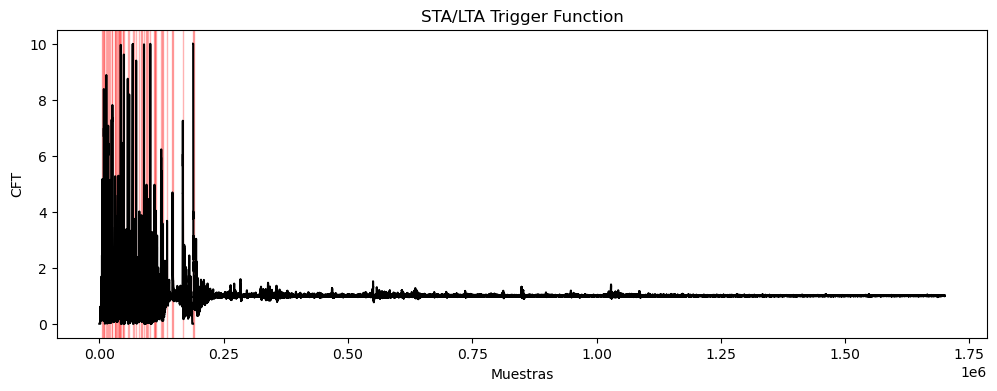

In [4]:
from obspy import read
from obspy.signal.trigger import classic_sta_lta, trigger_onset
import matplotlib.pyplot as plt

# Cargar la traza sísmica
st = read("CL.LC01.01.HHE.2018.062")
tr = st[0]

# Calcular STA/LTA
nsta = int(1 * tr.stats.sampling_rate)   # 1 segundo
nlta = int(10 * tr.stats.sampling_rate)  # 10 segundos
cft = classic_sta_lta(tr.data, nsta, nlta)

# Detectar eventos
on_off = trigger_onset(cft, 3.5, 1.0)  # on=3.5, off=1.0

# Visualizar CFT con triggers
plt.figure(figsize=(12, 4))
plt.plot(cft, 'k')
for trigger in on_off:
    plt.axvspan(trigger[0], trigger[1], color="red", alpha=0.3)
plt.title("STA/LTA Trigger Function")
plt.xlabel("Muestras")
plt.ylabel("CFT")
plt.show()


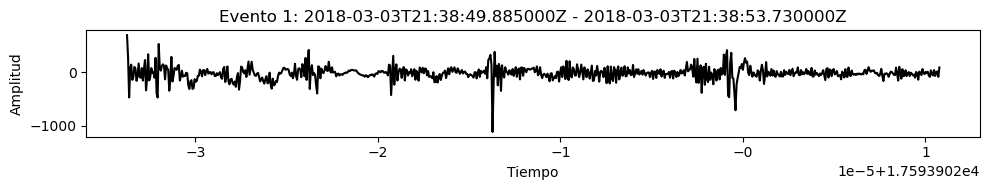

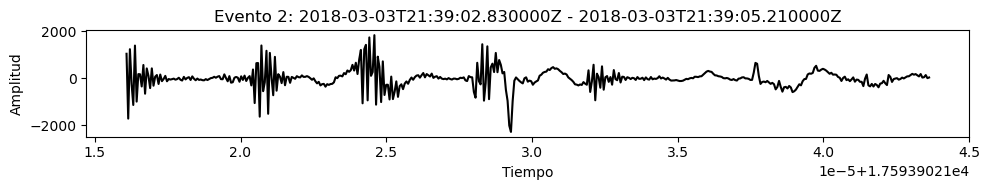

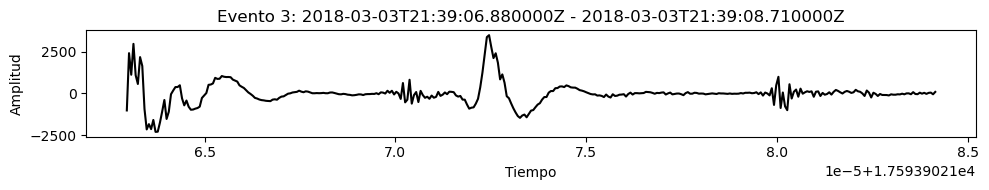

In [5]:
for i, (start, end) in enumerate(on_off[:3]):  # Solo los primeros 3 eventos
    t1 = tr.stats.starttime + start / tr.stats.sampling_rate
    t2 = tr.stats.starttime + end / tr.stats.sampling_rate
    event = tr.slice(t1, t2)
    
    plt.figure(figsize=(10, 2))
    plt.plot(event.times("matplotlib"), event.data, 'k')
    plt.title(f"Evento {i+1}: {t1} - {t2}")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.tight_layout()
    plt.show()


In [2]:
import os
import csv
from obspy import read
from tqdm import tqdm  # <-- importa tqdm

carpeta = r"C:\Users\nicol\OneDrive\Escritorio\2021"

datos = []

# Envuelve la lista de archivos con tqdm para barra de progreso
for filename in tqdm(os.listdir(carpeta), desc="Procesando archivos"):
    ruta_archivo = os.path.join(carpeta, filename)
    if os.path.isfile(ruta_archivo):
        try:
            st = read(ruta_archivo)
            for tr in st:
                duracion = tr.stats.endtime - tr.stats.starttime
                datos.append({
                    "archivo": filename,
                    "duracion_segundos": duracion,
                    "estacion": tr.stats.station,
                    "canal": tr.stats.channel,
                    "sampling_rate": tr.stats.sampling_rate,
                    "npts": tr.stats.npts,
                    "starttime": str(tr.stats.starttime),
                    "endtime": str(tr.stats.endtime),
                })
        except Exception as e:
            print(f"No se pudo leer {filename}: {e}")

campos = ["archivo", "duracion_segundos", "estacion", "canal", "sampling_rate", "npts", "starttime", "endtime"]

with open("resumen_archivos.csv", 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=campos)
    writer.writeheader()
    for d in datos:
        writer.writerow(d)

print("Archivo resumen_archivos.csv creado con éxito.")


c:\Users\nicol\anaconda3\envs\volcan-seismic\Lib\site-packages\obspy\core\util\base.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Procesando archivos: 100%|██████████| 3447/3447 [07:31<00:00,  7.63it/s]

Archivo resumen_archivos.csv creado con éxito.


Duración promedio (s): 86093.62
Duración mediana (s): 86399.99
Duración moda(s): 86399.99
Duración mínima (s): 1980.44
Duración máxima (s): 172799.99


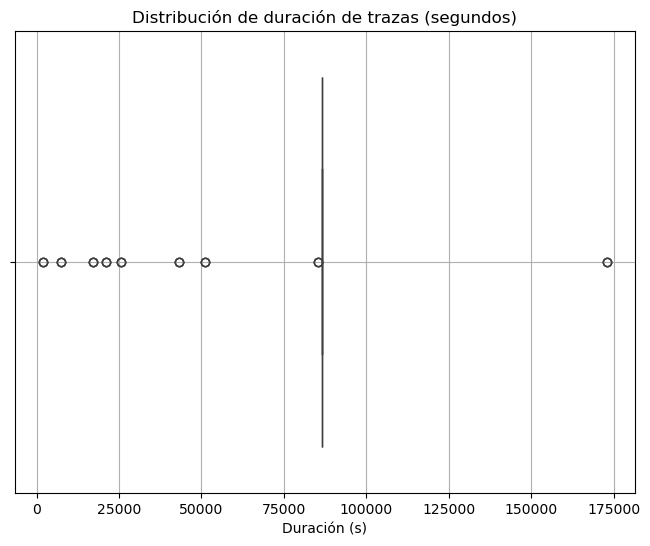

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("resumen_archivos.csv")
df['duracion_segundos'] = pd.to_numeric(df['duracion_segundos'], errors='coerce')

promedio = df['duracion_segundos'].mean()
mediana = df['duracion_segundos'].median()
moda = df['duracion_segundos'].mode()
minimo = df['duracion_segundos'].min()
maximo = df['duracion_segundos'].max()

print(f"Duración promedio (s): {promedio:.2f}")
print(f"Duración mediana (s): {mediana:.2f}")
print(f"Duración moda(s): {', '.join(map(str, moda.values))}")
print(f"Duración mínima (s): {minimo:.2f}")
print(f"Duración máxima (s): {maximo:.2f}")

plt.figure(figsize=(8,6))
sns.boxplot(x=df['duracion_segundos'])
plt.title("Distribución de duración de trazas (segundos)")
plt.xlabel("Duración (s)")
plt.grid(True)
plt.show()


In [8]:
import pandas as pd

df = pd.read_csv("resumen_archivos.csv")
df['duracion_segundos'] = pd.to_numeric(df['duracion_segundos'], errors='coerce')

moda = df['duracion_segundos'].mode()

total = len(df)

for valor in moda:
    conteo = (df['duracion_segundos'] == valor).sum()
    porcentaje = (conteo / total) * 100
    print(f"El valor de moda {valor} aparece {conteo} veces de {total} ({porcentaje:.2f}%)")


El valor de moda 86399.99 aparece 3420 veces de 3447 (99.22%)


Archivo seleccionado: CL.LC03.01.HHN.2022.354


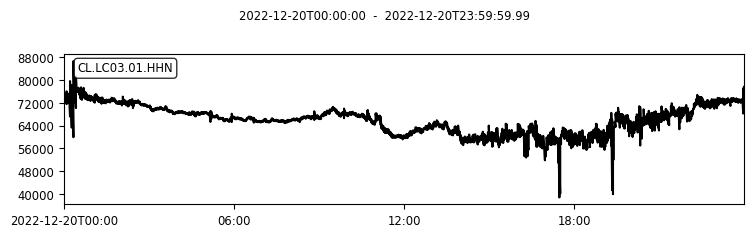

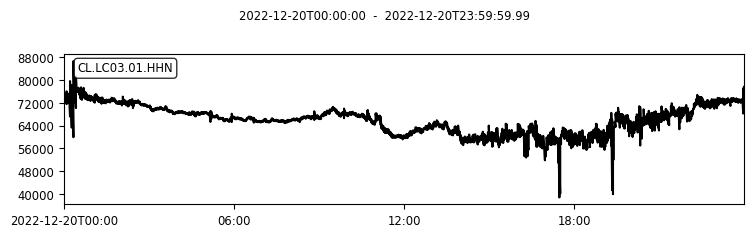

In [10]:
import os
import random
from obspy import read
import matplotlib.pyplot as plt

carpeta = r"C:\Users\nicol\OneDrive\Escritorio\2021"

# Lista todos los archivos
archivos = [f for f in os.listdir(carpeta) if os.path.isfile(os.path.join(carpeta, f))]

# Escoge uno al azar
archivo_random = random.choice(archivos)
ruta_archivo = os.path.join(carpeta, archivo_random)

print(f"Archivo seleccionado: {archivo_random}")

# Leer el archivo con ObsPy
st = read(ruta_archivo)

# Graficar cada traza en el stream
st.plot()

Analizando archivo: CL.LC01.01.HHN.2022.002


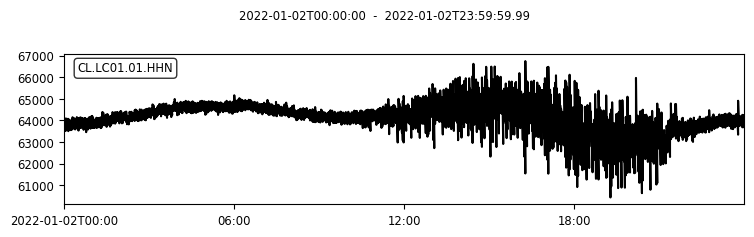

No se detectaron eventos en este archivo.


In [15]:
import os
import random
from obspy import read
from obspy.signal.trigger import classic_sta_lta, trigger_onset
import numpy as np
random.seed(32)  # Para reproducibilidad
carpeta = r"C:\Users\nicol\OneDrive\Escritorio\2021"

# Selecciona un archivo random
archivos = [f for f in os.listdir(carpeta) if os.path.isfile(os.path.join(carpeta, f))]
archivo = random.choice(archivos)
ruta = os.path.join(carpeta, archivo)

print(f"Analizando archivo: {archivo}")

st = read(ruta)

duraciones_eventos = []

for tr in st:
    df = tr.stats.sampling_rate
    cft = classic_sta_lta(tr.data, int(5 * df), int(10 * df))  # ventanas STA=5s, LTA=10s
    triggers = trigger_onset(cft, 3.5, 0.5)  # umbrales on=3.5, off=0.5

    for trig in triggers:
        dur = (trig[1] - trig[0]) / df
        duraciones_eventos.append(dur)
    st.plot()  # Graficar la traza

if duraciones_eventos:
    print(f"Eventos detectados: {len(duraciones_eventos)}")
    print(f"Duración promedio de eventos: {np.mean(duraciones_eventos):.2f} segundos")
else:
    print("No se detectaron eventos en este archivo.")
